# 1
## a

In [1]:
%%latex
\begin{gather*}
L_0 = \frac{(x - x_1)(x - x_2)(x - x_3)}{(x_0 - x_1)(x_0 - x_2)(x_0 - x_3)}\\\\

L_1 = \frac{(x - x_0)(x - x_2)(x - x_3)}{(x_1 - x_0)(x_1 - x_2)(x_1 - x_3)}\\\\

L_2 = \frac{(x - x_0)(x - x_1)(x - x_3)}{(x_2 - x_0)(x_2 - x_1)(x_2 - x_3)}\\\\

L_3 = \frac{(x - x_0)(x - x_1)(x - x_2)}{(x_3 - x_0)(x_3 - x_1)(x_3 - x_2)}
\end{gather*}

<IPython.core.display.Latex object>

## b

In [2]:
%%latex
\begin{gather*}
P_3(x) = f(x_0)L_0(x) + f(x_1)L_1(x) + f(x_2)L_2(x) + f(x_3)L_3(x)\\

\end{gather*}

<IPython.core.display.Latex object>

## c

Populating the interactive namespace from numpy and matplotlib


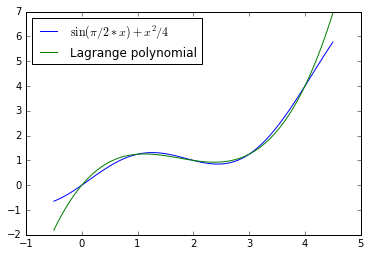

In [3]:
%pylab inline
import numpy as np

def lagrangePoly(function, points):
    """return an interpolating polynomial for the given function through the given points"""
    
    def L(x_k, x):
        result = 1
        for x_i in points:
            if x_i != x_k:
                result *= (x - x_i) / (x_k - x_i)
        return result
    
    return lambda x : sum(function(x_k)*L(x_k, x) for x_k in points)

originalFunction = lambda x: sin(pi/2 * x) + x**2/4
interpolant_c = lagrangePoly(originalFunction, [0, 2, 3, 4])

x = np.linspace(-0.5, 4.5, 100)

pylab.plot(x, originalFunction(x), label='$ \sin(\pi/2*x) + x^2/4 $')
pylab.plot(x, list(interpolant_c(x_i) for x_i in x), label='Lagrange polynomial')
pylab.legend(loc = 'upper left')


## d

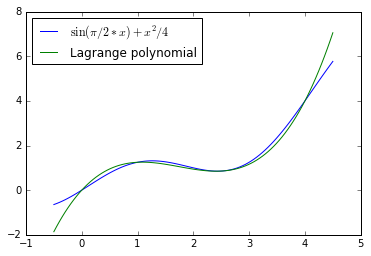

In [4]:
interpolant_d = lagrangePoly(originalFunction, [0, 1, 2.5, 4])

pylab.plot(x, originalFunction(x), label='$ \sin(\pi/2*x) + x^2/4 $')
pylab.plot(x, list(interpolant_d(x_i) for x_i in x), label='Lagrange polynomial')
pylab.legend(loc = 'upper left')

In [5]:
#sum of squared residuals
error_c = sum((interpolant_c(x_i) - originalFunction(x_i)**2 for x_i in x))
error_d = sum((interpolant_d(x_i) - originalFunction(x_i)**2 for x_i in x))
print('sum of squared residuals in part c: %.2f' % error_c)
print('sum of squared residuals in part d: %.2f' % error_d)

sum of squared residuals in part c: -297.36
sum of squared residuals in part d: -300.10


Both sets of points result in similar and close to equally good interpolants.

# 2
## a

In [6]:
%%latex
\begin{gather*}

e = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-0)(x-2)(x-3)(x-4)\\
e = \frac{\pi^4\sin\left(\frac{\pi}{2}\xi\right)}{384}(x)(x-2)(x-3)(x-4)

\end{gather*}

<IPython.core.display.Latex object>

## b

In [7]:
%%latex
$\sin$ is bounded to $\pm 1$ for all possible values of $\xi$, which means that the in the limit of
large $x$, the first part does not increase, so the error only depends on the product terms on the
right, so the error is $\mathcal{O}(x^4)$.

<IPython.core.display.Latex object>

## c

In [8]:
from scipy.optimize import minimize
from scipy import pi

errorFunction = lambda x: pi**4/384*abs((x)*(x-2)*(x-3)*(x-4))#abs(interpolant_c(x) - originalFunction(x))

errorFunctionReal = lambda x: abs(interpolant_c(x) - originalFunction(x))

minima = minimize(lambda x: -errorFunction(x), .5, bounds=[(0, 4)]).x
minX = max(minima, key = errorFunction)


print('upper bound on error is %f at %f' % (errorFunction(minX), minX))

oneFinalNumber = errorFunction(minX)

print(oneFinalNumber)

upper bound on error is 1.753896 at 0.673655
1.75389552999


Populating the interactive namespace from numpy and matplotlib
1.10414767
0.984914011813
maximum error is 0.180758 at 0.375651


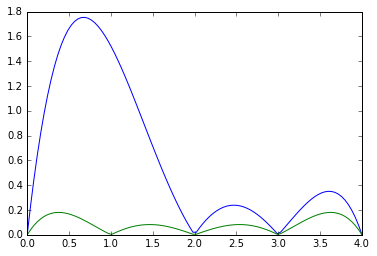

In [9]:
%pylab inline
print(interpolant_c(minX))
print(originalFunction(minX))

pylab.plot(linspace(0, 4, 100), list(errorFunction(x_i) for x_i in linspace(0, 4, 100)))

pylab.plot(linspace(0, 4, 100), list(errorFunctionReal(x_i) for x_i in linspace(0, 4, 100)))

minima = minimize(lambda x: -errorFunctionReal(x), .5, bounds=[(0, 4)]).x #1 is an arbitrary initial guess

minX = max(minima, key = errorFunction)


print('maximum error is %f at %f' % (errorFunctionReal(minX), minX))

# 3
## a

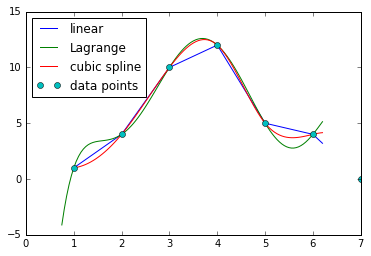

In [10]:
from scipy.interpolate import *

x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 4, 10, 12, 5, 4, 0]

space = np.arange(0.75, 6.25, 0.05)

linearInterp = interp1d(x, y, kind='linear', bounds_error=False)
lagrangeInterp = lagrange(x, y)
splineInterp = interp1d(x, y, kind='cubic', bounds_error=False)

pyplot.plot(space, linearInterp(space), label='linear')
pyplot.plot(space, lagrangeInterp(space), label='Lagrange')
pyplot.plot(space, splineInterp(space), label='cubic spline')

pyplot.plot(x, y, 'o', label='data points')

pyplot.legend(loc='best')

## b

The linear interpolation goes straight between the points. The cubic spline produces a "natural-looking" smooth fit. The Lagrange polynomial results in a smooth curve between the points with sharper bumps in between than the cubic spline.

# 4
## a

In [11]:
%%latex

\begin{gather*}

E = kh^p\\

\log(E) = \log(kh^p) = \log(k) + p\log(h)\\\\



\begin{bmatrix}
    1 & \log(h_0) \\ 
    1 & \log(h_1) \\
    \vdots & \vdots\\
    1 & \log(h_n)
\end{bmatrix}
\begin{bmatrix}
\log(k)\\
p
\end{bmatrix}
=
\begin{bmatrix}
    \log(E_0) \\ 
    \log(E_1) \\
    \vdots\\
    \log(E_n)
\end{bmatrix}


\end{gather*}

<IPython.core.display.Latex object>

## b

In [12]:
%%latex

\begin{bmatrix}
    1 & 1 & \cdots & 1\\
    \log(h_0) & \log(h_1) & \cdots & \log(h_n)
\end{bmatrix}
\begin{bmatrix}
    1 & \log(h_0) \\ 
    1 & \log(h_1) \\
    \vdots & \vdots\\
    1 & \log(h_n)
\end{bmatrix}
\begin{bmatrix}
\log(k)\\
p
\end{bmatrix}
=
\begin{bmatrix}
    1 & 1 & \cdots & 1\\
    \log(h_0) & \log(h_1) & \cdots & \log(h_n)
\end{bmatrix}
\begin{bmatrix}
    \log(E_0) \\ 
    \log(E_1) \\
    \vdots\\
    \log(E_n)
\end{bmatrix}

<IPython.core.display.Latex object>

## c

In [13]:
rawData = np.matrix('''
5.00000e-02, 1.036126e-01;
2.50000e-02, 3.333834e-02;
1.25000e-02, 1.375409e-02;
6.25000e-03, 4.177237e-03;
3.12500e-03, 1.103962e-03;
1.56250e-03, 2.824698e-04;
7.81250e-04, 7.185644e-05;
3.90625e-04, 1.813937e-05'''
)

h = rawData[:, 0]
E = rawData[:, 1]

ones = np.matrix([1] * h.size)

A_T = np.concatenate([ones, log(h.transpose())])
A = A_T.transpose()

x = (A_T*A)**-1 * A_T * log(E)

k = exp(x[0][0])
p = x[1][0]

print('k = %f\np = %f' % (k, p))

k = 28.432771
p = 1.790291


## d

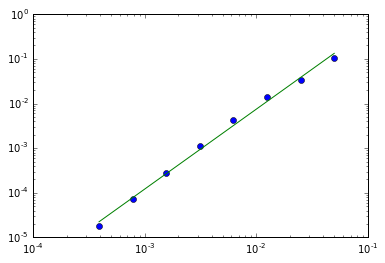

In [14]:
space = np.linspace(np.amin(h), np.amax(h), 100)
E_fit = k*space**p

pyplot.loglog(h, E, 'o')
pyplot.loglog(space, E_fit.flat)